**Brian Blaylock**  
**April 17, 2019**

# Figure XX: Map events HRRR and GLM


1. **Lake Christine Fire**: `21:00 UTC 5 July 2018`
    - A convective envent recommended by Robert Zeil. The fire started on 3 July 2018, cause by humans, and spread rapidly on 4 July 2018 due to thunderstom outflow or a gravity wave. Fuels were extreamly dry and RH was in single digits. On 4 July 2018, approximatly 1793 residents from 664 homes were evacuated. Three homes were destroyed. By 7 July, almost half of the evacuees returned to their homes.
2. **Mallard Fire** `23:00 UTC 15 May 2018`
    - Texas, was forecasted well.  
3. **Utah Thunderstorm** `06:00 UTC 17 July 2018`
    - Thunderstorm in Utah was poorly forecasted but saw lots of lightning.

## Research Questions
1. How well did the HRRR model forecast the thunderstorms for the area.
2. Did the GLM lightning flashes provide any warning? 
3. From the initial GLM flashes, what was the predicted risk of continued lightning and convective activity for the area?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_cmap.reflectivity_cmap import reflect_ncdc

from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

from fires_list import get_fire

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.03
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
    
mpl.rcParams['savefig.dpi'] = 600    # 600 for print

Create HRRR map.
loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_c_2000.npy map from file
Forecasts [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Generate domains and masks.
HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
Utah Area in meters squared: 219973261639.39685
Colorado Area in meters squared: 269906899003.7569
Texas Area in meters squared: 688270731111.2987
Florida Area in meters squared: 149996892486.02234
dict_keys(['HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Texas', 'Florida'])


In [2]:
c = reflect_ncdc()

In [19]:
#FIRE = get_fire('Lake Christine')
FIRE = get_fire('Mallard')
#FIRE = get_fire('July Storm')


DATE = FIRE['event']
LON = FIRE['longitude']
LAT = FIRE['latitude']

m = draw_centermap((LAT,LON), size=(3.5, 3.5))

In [20]:
FIRE

{'name': 'Mallard',
 'cause': 'Lightning',
 'sDATE': datetime.datetime(2018, 5, 14, 0, 0),
 'event': datetime.datetime(2018, 5, 16, 1, 0),
 'event other': datetime.datetime(2018, 5, 15, 23, 0),
 'latitude': 34.81,
 'longitude': -101.306}

In [21]:
lat, lon = get_hrrr_latlon(DICT=False)
Hrefc = get_hrrr_variable(DATE, 'REFC:entire', verbose=False)

In [22]:
mHRRR = draw_HRRR_map()

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [23]:
# GLM Files for the hour
GLM_files = get_GOES_nearesttime(DATE-timedelta(minutes=30), product='GLM', satellite=16, window=30)

# GLM flash data from those files
GLM_flash = accumulate_GLM_FAST(GLM_files, data_type='flash')

# Boolean for flashes inside HRRR domain
GLM_in_HRRR = filter_by_HRRR(GLM_flash['latitude'], GLM_flash['longitude'], lat, lon, mHRRR) 

# Rewrite lightning flashes for only in HRRR domian
GLM_flash['longitude'] = GLM_flash['longitude'][GLM_in_HRRR]
GLM_flash['latitude'] = GLM_flash['latitude'][GLM_in_HRRR]

Requested 2018-05-16 01:30:00	satellite: GOES-16	Product: GLM
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180516/00/
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180516/01/
Looking here: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180516/02/
---------------------------------------------------
 Window == +/- 30 Minutes
    first observation: 2018-05-16 01:00:00
     last observation: 2018-05-16 02:00:00
  Returning data from 180 GLM files (expected 180)
---------------------------------------------------


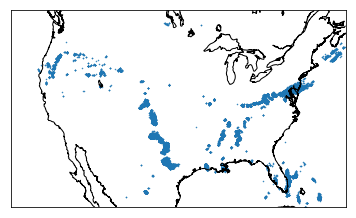

In [24]:
mHRRR.scatter(GLM_flash['longitude'], GLM_flash['latitude'], latlon=True, marker='.', s=1)
mHRRR.drawcoastlines()

## Get the contingency stats

In [25]:
g = get_GLM_HRRR_contingency_stats(DATE)

(1/7) Get GLM Events. 2018-05-16 02:00:00
-->> Accumulate GLM FAST MP: 80.0%
Got 180 of 180 expected files.
Total Events: 6,683,946
(2/7) Get HRRR Data.
(3/7) Filter GLM.
(4/7) Put GLM on HRRR grid.
In-HRRR Events: 2,240,687
      2,240,687 events in HRRR
         16,600 events in West
        965,859 events in Central
      1,067,317 events in East
            714 events in Utah
         42,442 events in Colorado
        566,935 events in Texas
         57,763 events in Florida
(5/7) Bloat GLM data with spatial filter.
(6/7) Generate binary grids.
(7/7) Compute contingency table for each subdomain.
    Stats for HRRR
    Stats for West
    Stats for Central
    Stats for East
    Stats for Utah
    Stats for Colorado
    Stats for Texas
    Stats for Florida
(FIN)


In [26]:
g.keys()

dict_keys(['Number Events', 'table', 'Observed Binary', 'Forecast Binary', 'Number GLM Files', 'Number Expected Files', 'DATETIME'])

In [27]:
def add_fire_point():
    m.scatter(FIRE['longitude'], FIRE['latitude'], latlon=True, facecolors='none', edgecolors='w', s=10)

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


valid 0200 UTC 16 May 2018


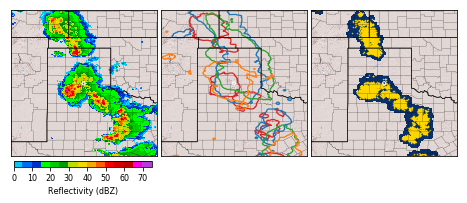

In [28]:
xpixels = 1000

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))


plt.sca(ax1)
#pr = m.pcolormesh(lon, lat, Hrefc['value'], latlon=True,
#                  cmap=c['cmap'], vmax=c['vmax'], vmin=c['vmin'])
pr = m.contourf(lon, lat, Hrefc['value'].data, latlon=True, levels=range(0,80,5),
                cmap=c['cmap'], vmax=c['vmax'], vmin=c['vmin'])
m.drawstates(); m.drawcounties()
m.arcgisimage(service='World_Shaded_Relief', xpixels=xpixels)
if FIRE['name'] in ['Mallard', 'Lake Christine']:
    add_fire_point()

plt.sca(ax2)
m.contour(lon, lat, g['Forecast Binary'][0], levels=1, colors='tab:red')     #F01
m.contour(lon, lat, g['Forecast Binary'][5], levels=1, colors='tab:blue')    #F06
m.contour(lon, lat, g['Forecast Binary'][11], levels=1, colors='tab:green')  #F12
m.contour(lon, lat, g['Forecast Binary'][17], levels=1, colors='tab:orange') #F18
m.drawstates(); m.drawcounties()
m.arcgisimage(service='World_Shaded_Relief', xpixels=xpixels)
if FIRE['name'] in ['Mallard', 'Lake Christine']:
    add_fire_point()

plt.sca(ax3)
GLM_binary = np.ma.array(g['Observed Binary'], mask=g['Observed Binary']==0)
m.pcolormesh(lon, lat, GLM_binary, cmap='Blues_r', latlon=True)
m.scatter(GLM_flash['longitude'], GLM_flash['latitude'], c='gold', marker='.', s=1)
m.drawstates(); m.drawcounties()
m.arcgisimage(service='World_Shaded_Relief', xpixels=xpixels)
if FIRE['name'] in ['Mallard', 'Lake Christine']:
    add_fire_point()

# Colorbar
fig.subplots_adjust(bottom=0.01)
cbar_ax = fig.add_axes([0.13, 0.3, 0.24, 0.01]) # [left-right, up-down, width, height]
fig.colorbar(pr, cax=cbar_ax, orientation='horizontal', label='Reflectivity (dBZ)')

if False:
    # Add titles to each plot
    ax1.set_title('HRRR Simulated Reflectivity')
    ax2.set_title('HRRR Lightning Threat')
    ax3.set_title('GLM Events and Flashes')

plt.savefig('./figs/Fxx_event_%s' % FIRE['name'].replace(' ', '-'))

print(DATE.strftime('valid %H%M UTC %d %B %Y'))

In [17]:
H1 = get_hrrr_variable(datetime(2018, 5, 15, 23), 'REFC:entire', verbose=False)
H2 = get_hrrr_variable(datetime(2018, 5, 16, 0), 'REFC:entire', verbose=False)
H3 = get_hrrr_variable(datetime(2018, 5, 16, 1), 'REFC:entire', verbose=False)
H4 = get_hrrr_variable(datetime(2018, 5, 16, 2), 'REFC:entire', verbose=False)

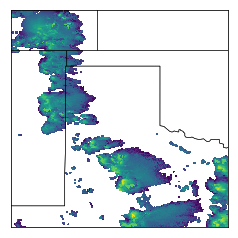

In [14]:
m.pcolormesh(lon, lat, H1['value'])
m.drawstates()

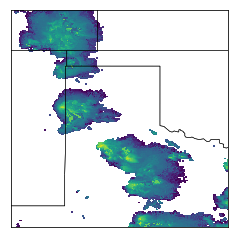

In [15]:
m.pcolormesh(lon, lat, H2['value'])
m.drawstates()

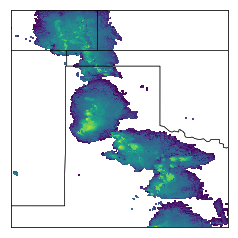

In [16]:
m.pcolormesh(lon, lat, H3['value'])
m.drawstates()

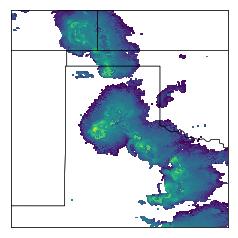

In [18]:
m.pcolormesh(lon, lat, H4['value'])
m.drawstates()